In [1]:
import numpy as np
import pandas as pd

In [3]:
import pandas_datareader.data as web
import datetime

In [4]:
start = datetime.datetime(2012,1,1)
end = datetime.datetime(2017,1,1)

In [23]:
apple = web.DataReader('AAPL', 'yahoo', start, end)
cisco = web.DataReader('CSCO', 'yahoo', start, end)
ibm = web.DataReader('IBM', 'yahoo', start, end)
amazon = web.DataReader('AMZN', 'yahoo', start, end)

In [24]:
for stock in (apple, cisco, ibm, amazon):
    stock['NormReturn'] = stock['Adj Close'] / stock.iloc[0]['Adj Close']

In [26]:
# 30% apple
# 20% cisco
# 40% amazon
# 10% ibm

In [27]:
for stock, allo in zip((apple, cisco, ibm, amazon), [.3, .2, .4, .1]):
    stock['Allocation'] = stock['NormReturn'] * allo

In [28]:
apple.head()

,High,Low,Open,Close,Volume,Adj Close,NormReturn,Allocation
Date,,,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.650659,1.000000,0.300000
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.718646,1.005374,0.301612
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.859850,1.016536,0.304961
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.994284,1.027163,0.308149
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.973674,1.025533,0.307660


In [29]:
for stock in (apple, cisco, ibm, amazon):
    stock['PosVal'] = stock['Allocation'] * 1000000

In [36]:
position_values = [apple['PosVal'], cisco['PosVal'], ibm['PosVal'], amazon['PosVal']]
portfolio = pd.concat(position_values, axis = 1)

In [37]:
portfolio

,PosVal,PosVal,PosVal,PosVal
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.266463,203864.721958,398368.066707,99150.977890
2012-01-05,304960.800749,203113.275422,396478.745533,99206.837860
2012-01-06,308148.786857,202361.828886,391926.944016,101999.665897
2012-01-09,307660.041023,203650.083128,389887.208404,99737.473483
...,...,...,...,...
2016-12-23,653264.272312,377461.414441,407400.308861,424839.430286
2016-12-27,657413.105004,379315.910241,408451.083123,430877.523138
2016-12-28,654609.855564,376101.342142,406129.524071,431285.265122


In [38]:
portfolio.columns = ['APPLE', 'CISCO', 'IBM', 'AMAZON']

In [39]:
portfolio['TOTAL'] = portfolio.sum(axis = 1)

In [40]:
portfolio

,APPLE,CISCO,IBM,AMAZON,TOTAL
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.266463,203864.721958,398368.066707,99150.977890,1.002996e+06
2012-01-05,304960.800749,203113.275422,396478.745533,99206.837860,1.003760e+06
2012-01-06,308148.786857,202361.828886,391926.944016,101999.665897,1.004437e+06
2012-01-09,307660.041023,203650.083128,389887.208404,99737.473483,1.000935e+06
...,...,...,...,...,...
2016-12-23,653264.272312,377461.414441,407400.308861,424839.430286,1.862965e+06
2016-12-27,657413.105004,379315.910241,408451.083123,430877.523138,1.876058e+06
2016-12-28,654609.855564,376101.342142,406129.524071,431285.265122,1.868126e+06


<AxesSubplot:xlabel='Date'>

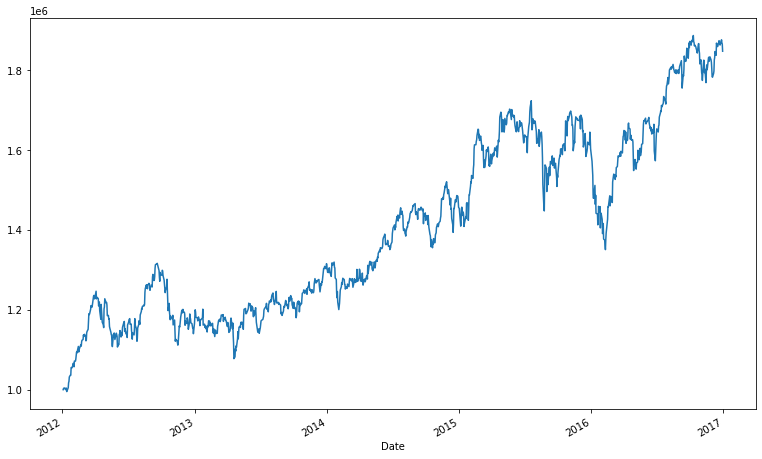

In [42]:
portfolio['TOTAL'].plot(figsize = (13,8))

<AxesSubplot:xlabel='Date'>

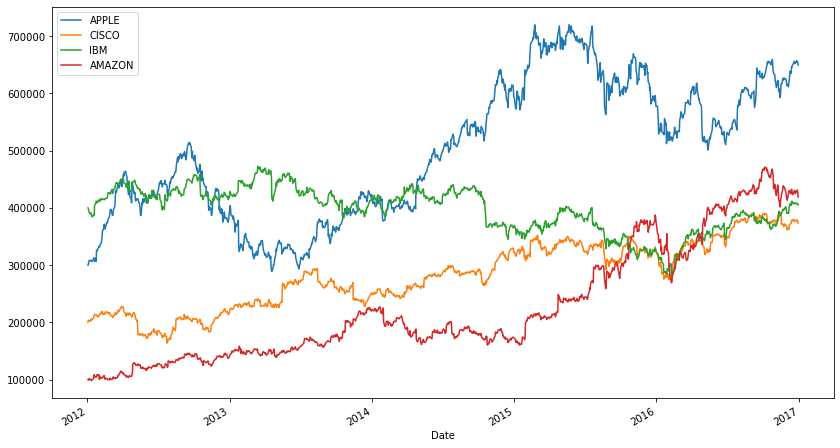

In [44]:
portfolio.drop('TOTAL', axis = 1).plot(figsize = (14,8))

In [45]:
portfolio['DailyReturn'] = portfolio['TOTAL'].pct_change(1)

In [46]:
portfolio

,APPLE,CISCO,IBM,AMAZON,TOTAL,DailyReturn
Date,,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06,NaN
2012-01-04,301612.266463,203864.721958,398368.066707,99150.977890,1.002996e+06,0.002996
2012-01-05,304960.800749,203113.275422,396478.745533,99206.837860,1.003760e+06,0.000761
2012-01-06,308148.786857,202361.828886,391926.944016,101999.665897,1.004437e+06,0.000675
2012-01-09,307660.041023,203650.083128,389887.208404,99737.473483,1.000935e+06,-0.003487
...,...,...,...,...,...,...
2016-12-23,653264.272312,377461.414441,407400.308861,424839.430286,1.862965e+06,-0.001025
2016-12-27,657413.105004,379315.910241,408451.083123,430877.523138,1.876058e+06,0.007028
2016-12-28,654609.855564,376101.342142,406129.524071,431285.265122,1.868126e+06,-0.004228


In [48]:
portfolio['DailyReturn'].mean(), portfolio['DailyReturn'].std()

(0.0005442753919199185, 0.010570999901849681)

<AxesSubplot:ylabel='Frequency'>

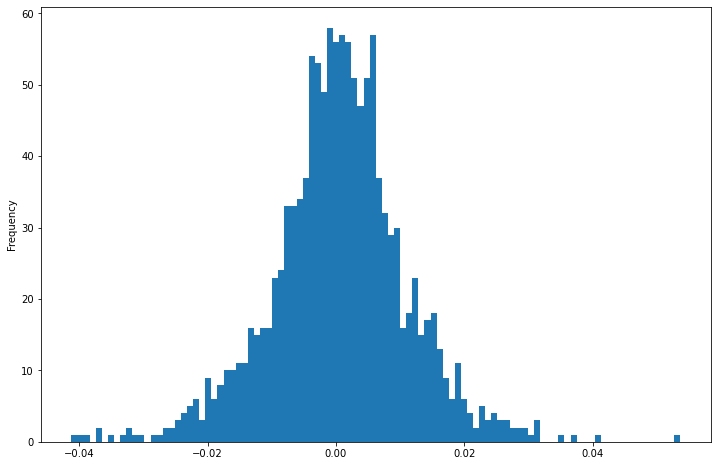

In [49]:
portfolio['DailyReturn'].plot(kind = 'hist', bins = 100, figsize = (12,8))

<AxesSubplot:ylabel='Density'>

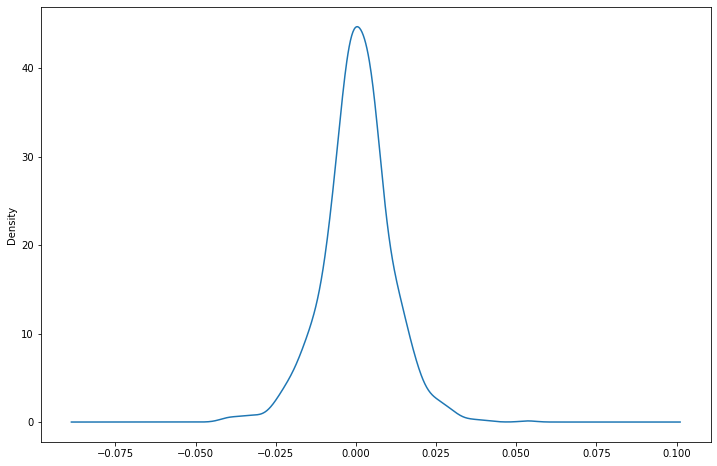

In [50]:
portfolio['DailyReturn'].plot(kind = 'kde', figsize = (12,8))

In [51]:
cumulative_return = 100 * (portfolio['TOTAL'][-1] / portfolio['TOTAL'][0] - 1)
cumulative_return

84.74606976287298

In [52]:
SR = portfolio['DailyReturn'].mean() / portfolio['DailyReturn'].std()

In [54]:
SR

0.05148759785956321

In [56]:
ASR = (252**0.5) * SR

In [57]:
ASR

0.8173402772430346